# Facial Recognition: Arnold Schwarzenegger vs Others
Complete supervised learning pipeline with modular structure

## Import Required Libraries and Functions

In [11]:
import numpy as np
from data_preprocessing import load_lfw_dataset, create_binary_labels, prepare_features
from model_pipeline import split_data, apply_pca, train_svm, predict_and_evaluate
from visualization import plot_results, plot_arnold_samples
from metrics import print_metrics, get_arnold_predictions

## Step 1: Load and Preprocess Data

In [12]:
# Load LFW dataset with balanced classes
lfw_data = load_lfw_dataset(balanced=True, min_faces_balance=10)
y = create_binary_labels(lfw_data)
X = prepare_features(lfw_data)

# Get image dimensions
n_samples, h, w = lfw_data.images.shape
print(f"Features shape: {X.shape}")
print(f"Image dimensions: {h} x {w}")

Loaded 4324 images from 158 people
Class distribution: Arnold=42, Others=4282
Features shape: (4324, 62500)
Image dimensions: 250 x 250


## Step 2: Train-Test Split

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = split_data(X, y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 3459
Testing set size: 865


## Step 3: PCA + Standardization

In [14]:
# Apply PCA for dimensionality reduction and standardization
X_train_pca, X_test_pca, pca, scaler = apply_pca(X_train, X_test)

print(f"PCA transformed training shape: {X_train_pca.shape}")
print(f"PCA transformed testing shape: {X_test_pca.shape}")

PCA: 62500 → 548 components (95.0% variance)
PCA transformed training shape: (3459, 548)
PCA transformed testing shape: (865, 548)


## Step 4: Train SVM Model

In [5]:
# Train SVM classifier
svm_model = train_svm(X_train_pca, y_train)
print("SVM model training complete!")

SVM model training complete!


## Step 5: Predict & Evaluate

In [15]:
# Make predictions and evaluate model performance
y_pred, metrics = predict_and_evaluate(svm_model, X_test_pca, y_test)

# Print detailed metrics
print_metrics(metrics)


Model Performance:
Accuracy:  0.991
Precision: 0.000
Recall:    0.000
F1-Score:  0.000

Classification Report:
              precision    recall  f1-score   support

      Others       0.99      1.00      1.00       857
      Arnold       0.00      0.00      0.00         8

    accuracy                           0.99       865
   macro avg       0.50      0.50      0.50       865
weighted avg       0.98      0.99      0.99       865



c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

## Step 6: Visualizations

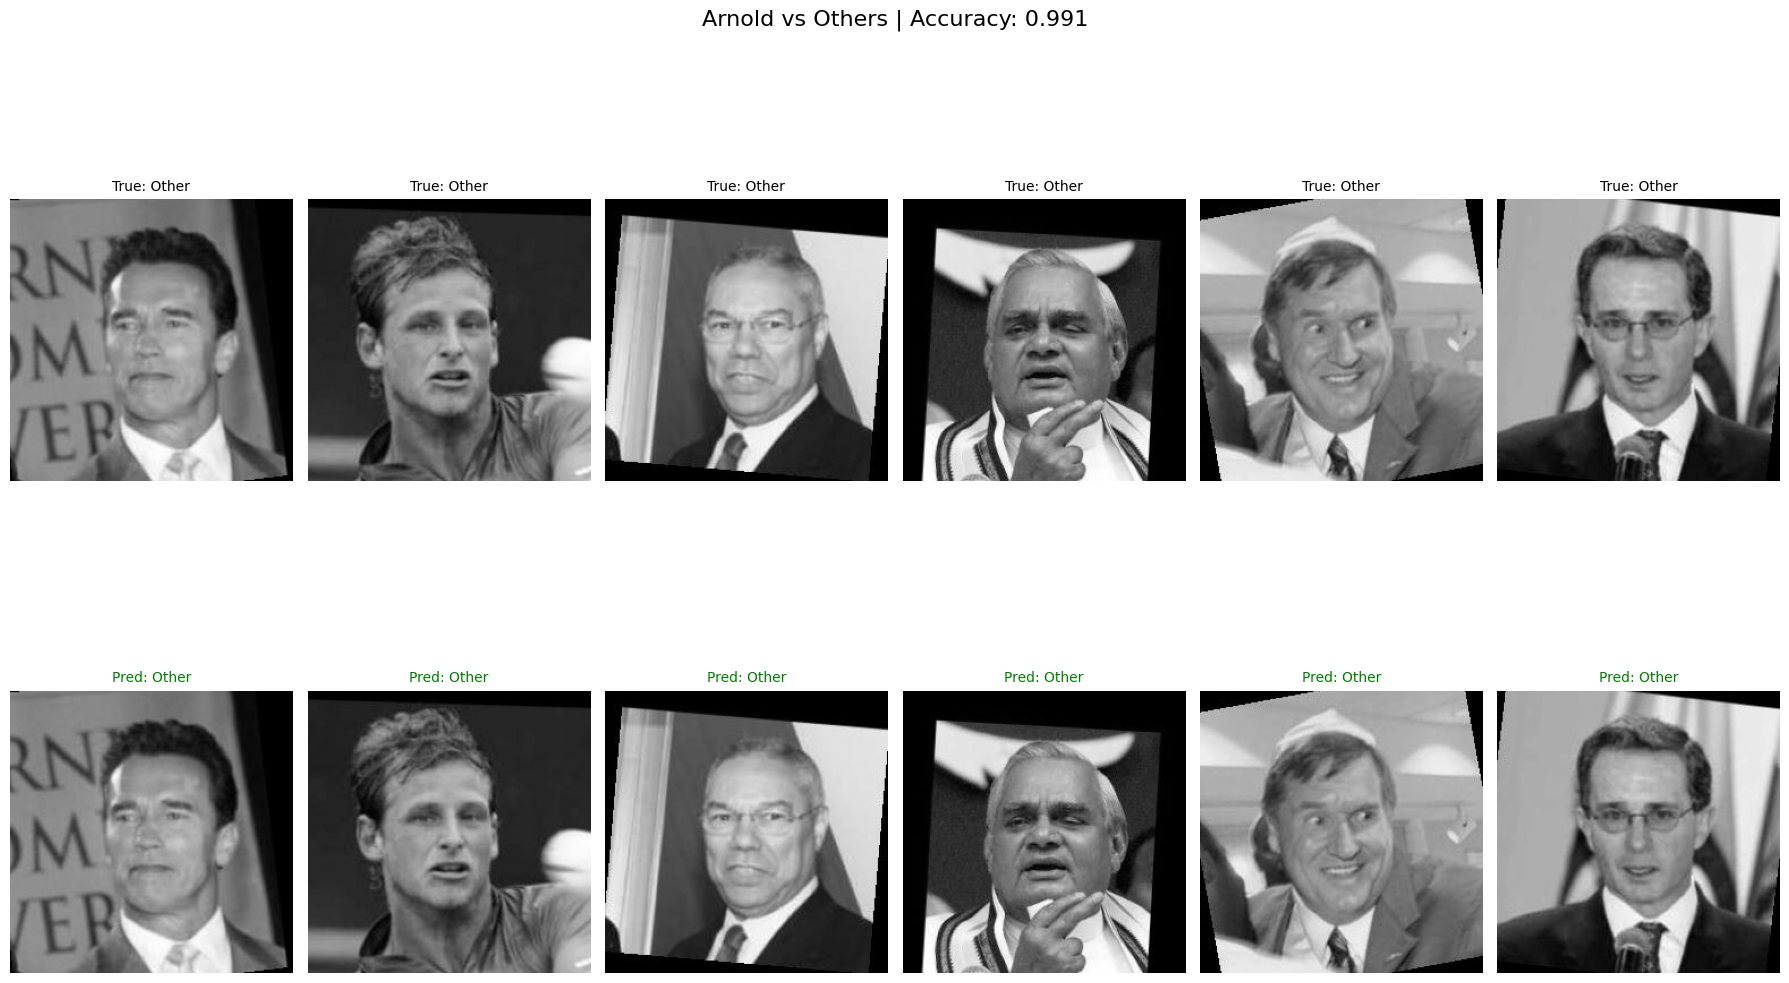

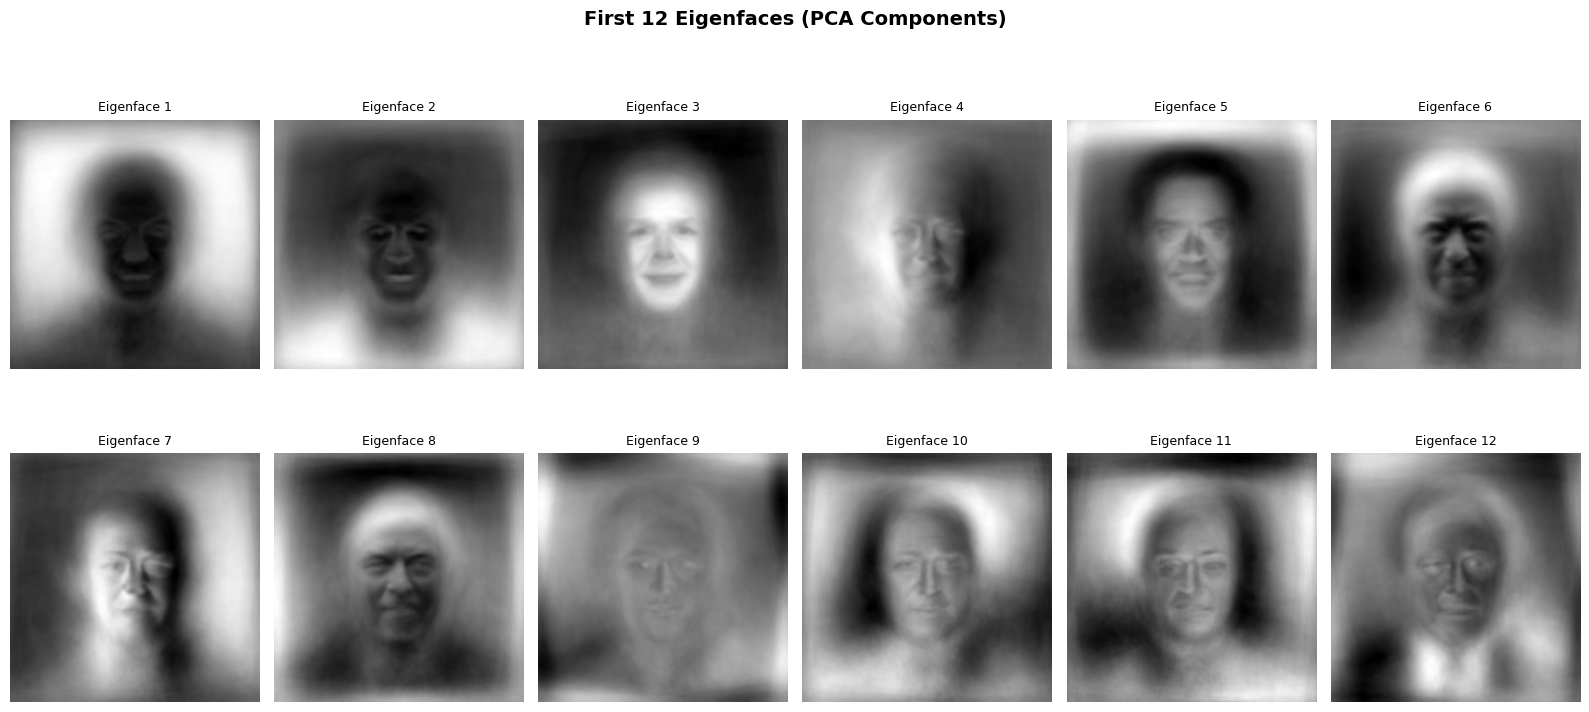

In [16]:
# Plot results: sample faces, predictions, and eigenfaces
plot_results(X_test, y_test, y_pred, pca, scaler, 
            lfw_data.images, h, w, metrics)

## Bonus: Arnold Test Samples

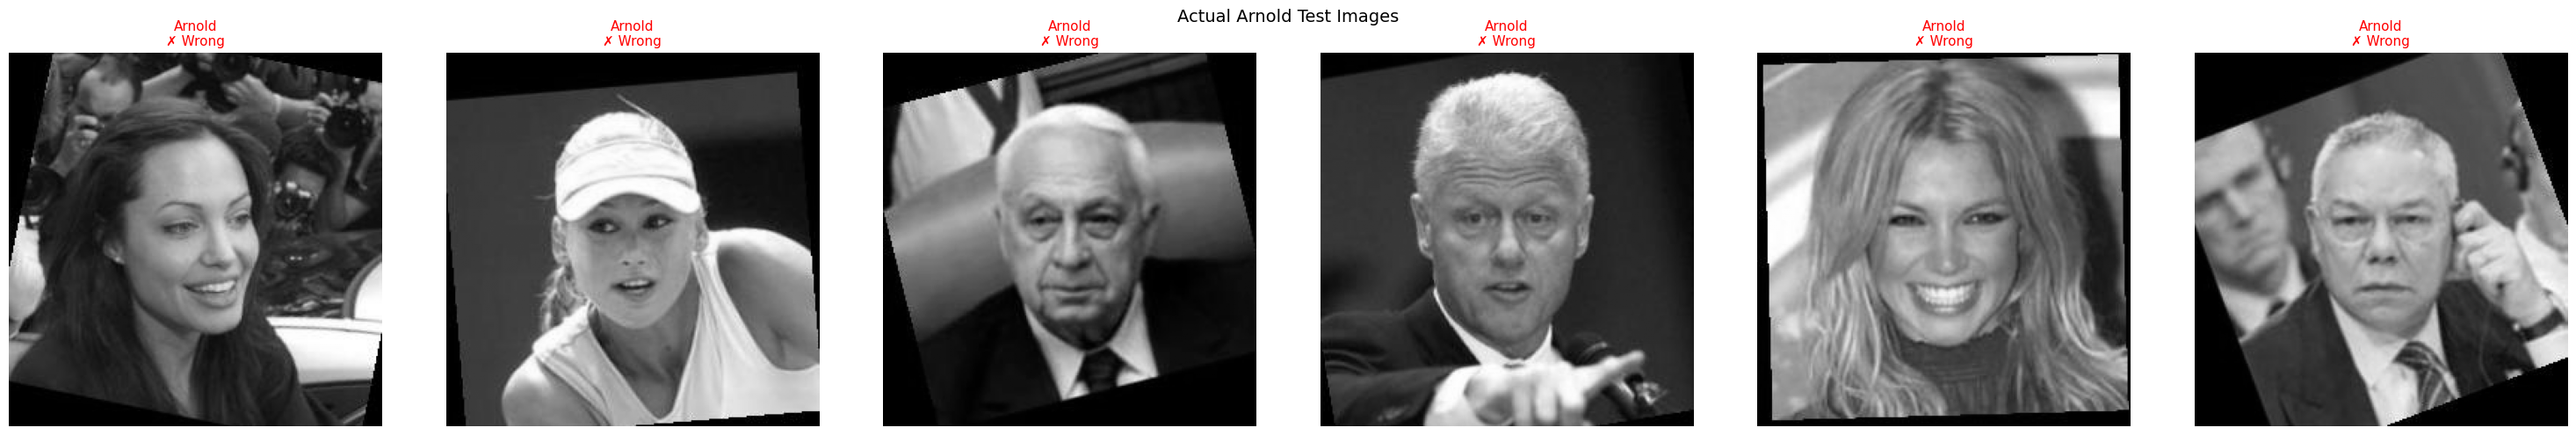

In [17]:
# Get and visualize Arnold test predictions
arnold_test_idx, arnold_preds = get_arnold_predictions(
    X_test, y_test, y_pred, lfw_data.images, h, w)

plot_arnold_samples(arnold_test_idx, arnold_preds, lfw_data.images, h, w)

## Project Summary

In [9]:
print("\n" + "="*50)
print(" PROJECT COMPLETE!")
print("="*50)
print(f"Model Accuracy: {metrics['accuracy']:.3f}")
print("Check visualizations above for detailed analysis.")


 PROJECT COMPLETE!
Model Accuracy: 0.991
Check visualizations above for detailed analysis.


In [18]:
pipeline = {
    'pca': pca,
    'scaler': scaler,
    'svm_model': svm_model
}
import joblib
joblib.dump(pipeline, 'face_recognition_pipeline.pkl')

['face_recognition_pipeline.pkl']